In [1]:
import scipy.io as sio
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [10]:
full_cov = sio.loadmat('CM/t1_mgc_5cv6_ck3_CM.mat')["CM"]
np.diagonal(full_cov).sum()

0.8489183836691168

In [3]:
data = sio.loadmat('data/dset.mat')

In [4]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'list_family', 'list_genus', 'list_species', 'X', 'Y_family', 'Y_genus', 'Y_species'])

In [5]:
Y_species = data.get('Y_species')

In [6]:
Y_species

array([[2],
       [6],
       [2],
       ...,
       [2],
       [2],
       [4]], dtype=int32)

In [7]:
Y_species[0]

array([2], dtype=int32)

In [8]:
Y_genus = data.get('Y_genus')

In [9]:
Y_genus

array([[1],
       [4],
       [1],
       ...,
       [1],
       [1],
       [3]], dtype=int32)

In [10]:
X_vec = data.get('X')

In [11]:
X_vec

array([[-1.        , -0.79157901, -0.47132089, ...,  0.03387781,
        -0.00885281, -0.0672629 ],
       [-1.        , -0.75100887, -0.29692549, ..., -0.0089381 ,
        -0.02778902, -0.02381729],
       [-1.        , -0.72247261, -0.33725829, ...,  0.04813121,
        -0.00157088, -0.0427371 ],
       ...,
       [-1.        , -0.93564477, -0.68621927, ...,  0.11352948,
         0.05300872, -0.0535954 ],
       [-1.        , -0.8340381 , -0.49843611, ...,  0.05572848,
        -0.01579687, -0.08851126],
       [-0.12638951, -1.        , -0.72838576, ..., -0.07915977,
        -0.02215331, -0.01018295]])

In [12]:
X_vec[0]

array([-1.        , -0.79157901, -0.47132089, -0.14234067, -0.14411304,
       -0.09044529, -0.04172556, -0.03841969, -0.00846288, -0.0190544 ,
       -0.05571323,  0.02356341,  0.08313416, -0.00232663, -0.10304176,
       -0.06014365,  0.01142573,  0.024184  , -0.00698871, -0.04246828,
       -0.00465208,  0.03387781, -0.00885281, -0.0672629 ])

In [13]:
lst_species = data.get('list_species')

In [14]:
lst_species

array([[array(['AdenomeraAndre'], dtype='<U14')],
       [array(['AdenomeraHylaedactylus'], dtype='<U22')],
       [array(['Ameeregatrivittata'], dtype='<U18')],
       [array(['HylaMinuta'], dtype='<U10')],
       [array(['HypsiboasCinerascens'], dtype='<U20')],
       [array(['HypsiboasCordobae'], dtype='<U17')],
       [array(['LeptodactylusFuscus'], dtype='<U19')],
       [array(['OsteocephalusOophagus'], dtype='<U21')],
       [array(['Rhinellagranulosa'], dtype='<U17')],
       [array(['ScinaxRuber'], dtype='<U11')]], dtype=object)

In [15]:
lst_species.size

10

In [16]:
x = np.random.random((10, 5))
y = np.random.random((10, 5))

n = x.shape[1]
cov_bias = np.mean(x * y, axis=1) - np.mean(x, axis=1) * np.mean(y, axis=1)
cov_bias * n / (n-1)

array([-0.06655594,  0.0026686 ,  0.07183098, -0.00988846,  0.123628  ,
       -0.03452711,  0.03299877,  0.00193611,  0.04113855,  0.05289635])

In [17]:
s = np.empty((X_vec.shape[0], 1))
for i in range(X_vec.shape[]):
    print(np.cov(X_vec[i]))

SyntaxError: invalid syntax (<ipython-input-17-4e90967b6924>, line 2)

In [18]:
res1_1 = np.cov(X_vec.T)

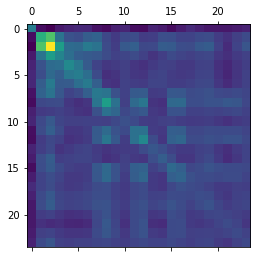

In [19]:
plt.matshow(res1_1)

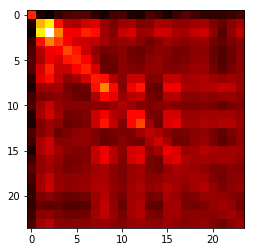

In [20]:
plt.imshow(res1_1,cmap='hot')

In [21]:
def my_mean(matrix):
    """
    Calculates mean values in a matrix
    Parameters:
      matrix: N-by-D data matrix
    Returns:
      mu: D-by-1 column vector of sample mean values, where mu(i) = mean(matrix(:,i)).
    """
    
    # Check if the matrix is not empty to make sure we do not divide by 0.
    if matrix.shape[0] == 0:
        s = 1
    else: 
        s = matrix.shape[0]
    
    # Compute sample mean vector
    mu = (np.sum(matrix, axis=0) / s).T 

    return mu

In [22]:
my_mean(X_vec)

array([-0.97318788, -0.82319933, -0.45284141, -0.15350882, -0.11334353,
       -0.06535949, -0.06740966, -0.07754996, -0.03475564, -0.03487282,
       -0.06777123, -0.03136216, -0.00152586, -0.05064469, -0.07172993,
       -0.03564018, -0.01567488, -0.03093575, -0.04516246, -0.0435331 ,
       -0.01132622,  0.00686621, -0.02225735, -0.0495312 ])

In [23]:
np.mean(X_vec, axis=0)

array([-0.97318788, -0.82319933, -0.45284141, -0.15350882, -0.11334353,
       -0.06535949, -0.06740966, -0.07754996, -0.03475564, -0.03487282,
       -0.06777123, -0.03136216, -0.00152586, -0.05064469, -0.07172993,
       -0.03564018, -0.01567488, -0.03093575, -0.04516246, -0.0435331 ,
       -0.01132622,  0.00686621, -0.02225735, -0.0495312 ])

In [24]:
def my_cov(X):
    """
    Calculates covariance of a NxD matrix.
    Parameters:
      matrix: N-by-D data matrix
    Returns:
      cov: D-by-D covariance matrix.
    """
    X_mean = my_mean(X)
    X_shifted = X - X_mean
    # Using Maximum Likelihood Estimation so divide by N
    cov = (X_shifted.T @ X_shifted) / X.shape[0]
    return cov

In [25]:
res1_1_1 = my_cov(X_vec)
res1_1_1

array([[ 0.01336069, -0.00436693, -0.00612976, -0.00285904, -0.00151266,
        -0.00076932, -0.00105396, -0.00383583, -0.00472881, -0.00201655,
        -0.00133025, -0.00444689, -0.00455238, -0.00152822, -0.00253963,
        -0.00454821, -0.00247017, -0.00050222, -0.00194453, -0.00315423,
        -0.00319055, -0.00307368, -0.00263878, -0.00172507],
       [-0.00436693,  0.02330341,  0.02742464,  0.01173026,  0.00558805,
         0.00484419,  0.00752413,  0.00836625,  0.00394996,  0.00181396,
         0.00410486,  0.00464275,  0.00206434,  0.0024231 ,  0.0050273 ,
         0.0047873 ,  0.00326046,  0.00317226,  0.0042075 ,  0.00472027,
         0.00214996,  0.00049349,  0.00270272,  0.0042717 ],
       [-0.00612976,  0.02742464,  0.04016468,  0.01964739,  0.01004831,
         0.00960635,  0.0129171 ,  0.01157223,  0.00439349,  0.00225425,
         0.00682279,  0.00783548,  0.00387532,  0.0040101 ,  0.00740469,
         0.00705408,  0.00488247,  0.00471466,  0.00655595,  0.00738152,
  

In [26]:
res1_1_1_np = np.cov(X_vec.T)
res1_1_1_np.shape

(24, 24)

In [27]:
res1_1_1 - res1_1_1_np

array([[-3.20477139e-06,  1.04747720e-06,  1.47031877e-06,
         6.85784823e-07,  3.62834302e-07,  1.84533949e-07,
         2.52808218e-07,  9.20082981e-07,  1.13427864e-06,
         4.83700127e-07,  3.19082204e-07,  1.06665634e-06,
         1.09195876e-06,  3.66566625e-07,  6.09170100e-07,
         1.09095865e-06,  5.92510068e-07,  1.20466136e-07,
         4.66426659e-07,  7.56590871e-07,  7.65303505e-07,
         7.37270465e-07,  6.32952383e-07,  4.13784147e-07],
       [ 1.04747720e-06, -5.58968890e-06, -6.57823023e-06,
        -2.81368764e-06, -1.34038042e-06, -1.16195583e-06,
        -1.80478144e-06, -2.00677585e-06, -9.47460639e-07,
        -4.35107345e-07, -9.84614771e-07, -1.11363529e-06,
        -4.95163923e-07, -5.81217709e-07, -1.20587622e-06,
        -1.14830887e-06, -7.82071774e-07, -7.60916953e-07,
        -1.00923393e-06, -1.13223035e-06, -5.15700509e-07,
        -1.18372377e-07, -6.48288811e-07, -1.02463408e-06],
       [ 1.47031877e-06, -6.57823023e-06, -9.63412776e

In [28]:
res1_1_2 = np.corrcoef(X_vec.T)

In [29]:
def my_corr_1(X):
    c = my_cov(X)
    try:
        d = np.diag(c)
    except ValueError:
        # scalar covariance
        # nan if incorrect value (nan, inf, 0), 1 otherwise
        return c / c
    stddev = np.sqrt(d.real)
#     print(stddev)
#     print(stddev[None, :])
#     c /= stddev[:, None]
#     c /= stddev[None, :]
    c /= np.dot(stddev.T, stddev)
    return c

In [30]:
def my_corr(X):
    c = my_cov(X)
    try:
        d = np.diag(c)
    except ValueError:
        # scalar covariance
        # nan if incorrect value (nan, inf, 0), 1 otherwise
        return c / c
    stddev = np.sqrt(d.real)
    c /= stddev[:, None] @ stddev[None, :]
    #c /= np.sqrt((np.dot(d.T, d)).real)
    return c

In [31]:
my_corr(X_vec) - np.corrcoef(X_vec.T)

array([[ 3.33066907e-16,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.38777878e-17,  0.00000000e+00,
        -1.38777878e-17, -5.55111512e-17, -5.55111512e-17,
         0.00000000e+00, -2.77555756e-17,  0.00000000e+00,
         0.00000000e+00, -2.77555756e-17, -1.11022302e-16,
         5.55111512e-17,  0.00000000e+00,  1.38777878e-17,
        -2.77555756e-17, -5.55111512e-17,  5.55111512e-17,
         0.00000000e+00, -5.55111512e-17,  0.00000000e+00],
       [ 0.00000000e+00, -1.11022302e-16, -1.11022302e-16,
        -1.11022302e-16,  0.00000000e+00,  5.55111512e-17,
        -5.55111512e-17, -5.55111512e-17, -2.77555756e-17,
        -1.38777878e-17,  1.11022302e-16, -5.55111512e-17,
        -1.38777878e-17, -5.55111512e-17, -5.55111512e-17,
        -5.55111512e-17, -5.55111512e-17,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -2.77555756e-17,
        -6.93889390e-18,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00, -1.11022302e-16,  0.00000000e

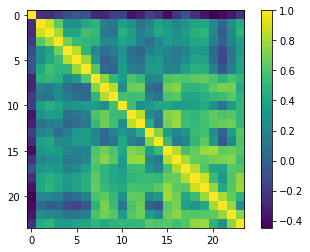

In [32]:
plt.imshow(my_corr(X_vec))
plt.colorbar()
plt.savefig('correlation.png')
plt.show()

In [33]:
l = np.array([1,2,3])

In [34]:
l[:, None]

array([[1],
       [2],
       [3]])

In [35]:
def my_corr_1(X):
    c = my_cov(X)
    
    try:
        d = np.diag(c)
    except ValueError:
        # scalar covariance
        # nan if incorrect value (nan, inf, 0), 1 otherwise
        return c / c
    std_dev = np.sqrt(d.real)
    c /= (std_dev[:, None] @ std_dev[None, :])
    
    return c

In [36]:
my_corr_1(X_vec) - np.corrcoef(X_vec.T)

array([[ 3.33066907e-16,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.38777878e-17,  0.00000000e+00,
        -1.38777878e-17, -5.55111512e-17, -5.55111512e-17,
         0.00000000e+00, -2.77555756e-17,  0.00000000e+00,
         0.00000000e+00, -2.77555756e-17, -1.11022302e-16,
         5.55111512e-17,  0.00000000e+00,  1.38777878e-17,
        -2.77555756e-17, -5.55111512e-17,  5.55111512e-17,
         0.00000000e+00, -5.55111512e-17,  0.00000000e+00],
       [ 0.00000000e+00, -1.11022302e-16, -1.11022302e-16,
        -1.11022302e-16,  0.00000000e+00,  5.55111512e-17,
        -5.55111512e-17, -5.55111512e-17, -2.77555756e-17,
        -1.38777878e-17,  1.11022302e-16, -5.55111512e-17,
        -1.38777878e-17, -5.55111512e-17, -5.55111512e-17,
        -5.55111512e-17, -5.55111512e-17,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -2.77555756e-17,
        -6.93889390e-18,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00, -1.11022302e-16,  0.00000000e

In [37]:
import scipy.linalg as linalg

In [38]:
eig_vals, eigen_vecs = linalg.eig(res1_1_1)

In [39]:
eig_vals.real

array([1.17646903e-01, 5.59964502e-02, 2.42093270e-02, 1.55476226e-02,
       1.22316198e-02, 9.74216178e-03, 8.46159950e-03, 5.83401715e-03,
       4.55011818e-03, 3.98763305e-03, 3.58101689e-03, 2.23870730e-03,
       1.79368418e-03, 1.51629368e-03, 1.35461344e-03, 6.02657141e-04,
       4.02776757e-04, 2.47162960e-04, 1.29613433e-04, 8.15988326e-05,
       5.37462664e-05, 2.92958358e-05, 1.28978029e-05, 1.90768654e-05])

In [40]:
idx = np.argsort(eig_vals)[::-1]
EVals = eig_vals[idx]
EVecs = eigen_vecs[:, idx]
EVecs_1 = eigen_vecs[:, idx]

In [41]:
for i in range(0, EVecs.shape[1]):
    if EVecs[:, i][0] < 0:
        EVecs[:, i] *= -1
EVecs

array([[ 1.35566887e-01,  8.35321521e-02,  1.39343292e-01,
         2.35836730e-01,  7.92784561e-01,  3.71688554e-01,
         1.05908489e-02,  9.72750321e-02,  3.33519654e-02,
         1.17935005e-01,  2.69972567e-01,  1.18842106e-01,
         1.16919068e-01,  2.88141044e-02,  3.72268076e-02,
         5.59499539e-02,  2.17526578e-02,  3.84054028e-02,
         1.76165381e-02,  4.34293020e-03,  5.86723949e-03,
         2.53209828e-03,  2.41699301e-03,  1.97547785e-03],
       [-3.27997850e-01,  2.76461872e-01, -4.14881187e-01,
         2.60996543e-02,  7.64748623e-02,  7.27669649e-03,
        -1.67824466e-01,  1.27710917e-01, -3.78131304e-01,
        -3.33946094e-01,  3.43485569e-01, -2.04416598e-01,
        -9.21294948e-03, -2.39193841e-01,  1.53771712e-01,
        -2.86230769e-01,  8.34651324e-02,  1.65392279e-02,
        -9.10762747e-02,  5.63021884e-03,  4.53399885e-03,
        -4.49090951e-03, -3.08219493e-03, -6.42320403e-03],
       [-4.76094616e-01,  4.12163911e-01, -3.61958364e

In [42]:
prop = EVals / sum(EVals)
cum_var = np.cumsum(prop)

In [43]:
cum_var

array([0.43529302+0.j, 0.64247964+0.j, 0.73205404+0.j, 0.78958018+0.j,
       0.83483711+0.j, 0.87088307+0.j, 0.90219095+0.j, 0.92377679+0.j,
       0.94061221+0.j, 0.95536643+0.j, 0.96861618+0.j, 0.97689938+0.j,
       0.98353601+0.j, 0.98914629+0.j, 0.99415835+0.j, 0.99638818+0.j,
       0.99787845+0.j, 0.99879295+0.j, 0.99927252+0.j, 0.99957444+0.j,
       0.9997733 +0.j, 0.99988169+0.j, 0.99995228+0.j, 1.        +0.j])

In [44]:
size = EVals.size - 1

In [45]:
req_cov_lst = [0.70, 0.80, 0.90, 0.95]
MinDims = np.zeros((len(req_cov_lst),), dtype=np.int32)
for i, cov_for in enumerate(req_cov_lst):
    for k in range(size):
        if cum_var[k]/cum_var[size] >= cov_for:
            MinDims[i] = k + 1
            break

In [46]:
MinDims

array([ 3,  5,  7, 10], dtype=int32)

In [47]:
def task1_3(X):
    # Input:
    # X: N * D matrix (double)
    # Output:
    # Evecs: D-by-D matrix (double) contains all eigenvectors as columns
    # NB: follow the Task 1.3 specifications on eigenvectors.
    # EVals: Eigenvalues in descending order, D x 1 vector
    # (Note that the i-th columns of Evecs should corresponds to the i-th element in EVals)

    covar_mat = X
    eigen_vals, eigen_vecs = np.linalg.eig(covar_mat)
    idx = np.argsort(eigen_vals)[::-1]
    EVals = eigen_vals[idx]
    EVecs = eigen_vecs[:, idx]

    # Change direction of negative evecs
    np.apply_along_axis(lambda x : x*(-1) if x[0] < 0 else x, 0, EVecs)
    # caluclate the cumulative variance
    cum_var = np.cumsum(EVals)
    # calculate min number of PCA dimensions required for the following percentages
    req_cov_lst = [0.70, 0.80, 0.90, 0.95]
    MinDims = np.zeros((len(req_cov_lst),), dtype=np.int32)
    for i, cov_for in enumerate(req_cov_lst):
        for k in range(EVals.size):
            if cum_var[k]/cum_var[EVals.size - 1] >= cov_for:
                MinDims[i] = k
                break
    sio.savemat('t1_EVecs.mat', mdict={'EVecs': EVecs})
    sio.savemat('t1_EVals.mat', mdict={'EVals': EVals})
    sio.savemat('t1_Cumvar.mat', mdict={'Cumvar': cum_var})
    sio.savemat('t1_MinDims.mat', mdict={'MinDims': MinDims})



In [51]:
task1_3(res1_1_1)

[0.4406638 +0.j 0.64927742+0.j 0.73804044+0.j 0.79710205+0.j
 0.83807166+0.j 0.87132687+0.j 0.90258667+0.j 0.92520385+0.j
 0.94189159+0.j 0.95685278+0.j 0.96974017+0.j 0.97771354+0.j
 0.98391932+0.j 0.98941371+0.j 0.99418565+0.j 0.99640239+0.j
 0.99787548+0.j 0.99880425+0.j 0.99927936+0.j 0.99958946+0.j
 0.99978031+0.j 0.99988518+0.j 0.9999529 +0.j 1.        +0.j]


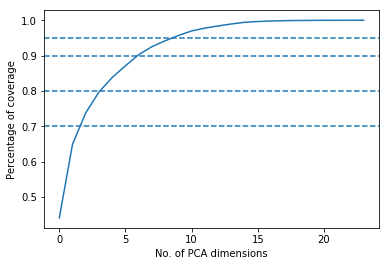

In [52]:
fig, ax = plt.subplots()
print(cum_var)
ax.plot(cum_var.real)
ax.axhline(y=0.7, linestyle="--")
ax.axhline(y=0.8, linestyle="--")
ax.axhline(y=0.9, linestyle="--")
ax.axhline(y=0.95, linestyle="--")
plt.xlabel("No. of PCA dimensions")
plt.ylabel("Percentage of coverage")
plt.savefig('cumvar.png')

In [53]:
X_mean = my_mean(X_vec)
X_shifted = X_vec - X_mean
P = eig_vecs_np.T.dot(X_shifted.T)

NameError: name 'eig_vecs_np' is not defined

In [54]:
plt.scatter(P)

NameError: name 'P' is not defined

In [55]:
P

NameError: name 'P' is not defined

In [48]:
from sklearn.preprocessing import StandardScaler
X_vec = StandardScaler().fit_transform(X_vec)

In [49]:
import pandas as pd
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_vec)
print(principalComponents)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
target_class = pd.DataFrame(data = Y_species, columns= ['target'])

[[-0.96115208 -0.51752839]
 [-1.77626468  1.55899023]
 [-1.0691801  -0.45865521]
 ...
 [-1.38474084 -2.88900184]
 [ 0.25067515 -1.20058806]
 [-1.54922938  0.87217107]]


In [50]:
finalDf = pd.concat([principalDf, target_class[['target']]], axis = 1)

In [51]:
finalDf.head()

,principal component 1,principal component 2,target
0,-0.961152,-0.517528,2
1,-1.776265,1.558990,6
2,-1.069180,-0.458655,2
3,1.174962,1.199775,9
4,-1.990948,2.490589,6


In [52]:
np.unique(Y_species)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int32)

In [53]:
import matplotlib.colors as mcolors

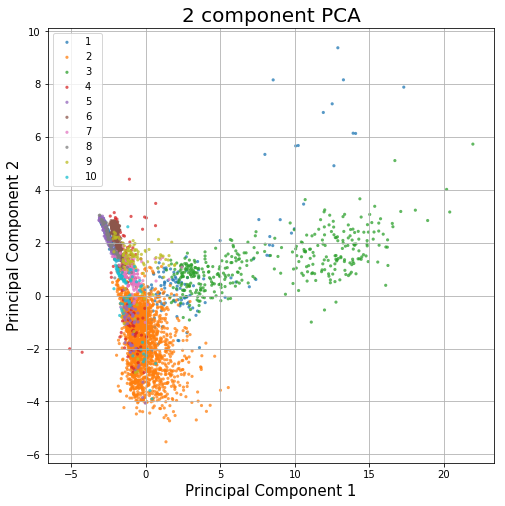

In [58]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = np.unique(Y_species)
colors = mcolors.TABLEAU_COLORS

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , edgecolor='none'
               , alpha=0.75
               , s = 10
              )
ax.legend(targets)
ax.grid()
plt.savefig('2d-pca.png')

In [63]:
Nc = np.count_nonzero(Y_species == 11)
Nc

0

In [64]:
pmap = np.zeros((len(X_vec), 1))

In [65]:
def my_k_folds(X, Y, k_folds):
    # Assuming classes follow the pattern 1..C;
    # C becomes the total no. of classes
    no_of_classes = np.max(Y)
    p_map = np.zeros((len(X), 1))
    
    for c in range(1, no_of_classes+1):
        Nc = np.count_nonzero(Y == c)
        Mc = int(np.floor(Nc / k_folds))
        # find indexes of all places where the element is c
        idxs = np.apply_along_axis(lambda x: x[0], 1, np.argwhere(Y == c))
        # split the idxs based on k_folds and Mc
        sub_arrs = _split(idxs, k_folds, Mc)
        for i in range(len(sub_arrs)):
            p_map[sub_arrs[i]] = i + 1
            
    return p_map

In [66]:
def my_k_folds_1(X, Y, k_folds):
    # Assuming classes follow the pattern 1..C;
    # C becomes the total no. of classes
    no_of_classes = np.max(Y)
    p_map = np.zeros((len(X), 1))
    
    for c in range(1, no_of_classes+1):
        Nc = sum(Y == c)[0]
        Mc = int(np.floor(Nc / k_folds))
        
        currentIndexX = 0
        
        for k in range(1,k_folds):
            currentIndexBin = 1

            while currentIndexBin <= Mc:
                if Y[currentIndexX] == c:
                    p_map[currentIndexX] = k
                    currentIndexBin = currentIndexBin + 1

                currentIndexX = currentIndexX + 1

        while currentIndexX < len(X):
            if Y[currentIndexX] == c:
                p_map[currentIndexX] = k_folds
            currentIndexX = currentIndexX + 1
    return p_map

In [67]:
a = np.argwhere(Y_species == 1)

In [68]:
ids = np.apply_along_axis(f, 1, a)

NameError: name 'f' is not defined

In [69]:
def _split(X, k, mc):
    curr = 1
    sub_arrays = []
    for i in range(k):
        if curr != k:
            start = i*mc
            end = i*mc + mc
            sub_arrays.append(X[start:end])
        else:
            start = i*mc
            sub_arrays.append(X[start:])
        curr += 1
    return sub_arrays

In [70]:
p_map = my_k_folds(X_vec, Y_species, 5)

In [71]:
p_map_1 = my_k_folds_1(X_vec, Y_species, 5)

In [72]:
sio.savemat("t1_mgc_5cv_PMap.mat", {"PMap": p_map})

In [73]:
from scipy.stats import multivariate_normal

In [74]:
def MyConfusionMatrix(y_actual, y_pred):
    '''
    Parameters:
        y_actual: actual labels
        y_pred: predicted labels of data
    Returns:
        CM: Confusion matrix for the data as a 2d numpy array
    '''
    if(y_actual.shape[0] != y_pred.shape[0]):
        raise ValueError("Vectors supplied must be of same length")
    
    # Convert the arrays to int32 to avoid indexing errors
    y_actual = y_actual.astype(np.int32, copy=False)
    y_pred = y_pred.astype(np.int32, copy=False)
    
    # Minimum and maximum values in order to know the size of the confusion matrix and how to access it
    # Problems come from classes indexing beginning with 1 and data array indexing with 0
    max_actual = np.max(y_actual)
    max_predicted = np.max(y_pred)
    min_actual = np.min(y_actual)
    min_predicted = np.min(y_pred)

    N = max_actual + 1 if min_actual == 0 else max_actual
    M = max_predicted + 1 if min_predicted == 0 else max_predicted

    confusion_matrix = np.zeros((N,M))

    for index in range(y_pred.shape[0]):
        i = y_actual[index] if min_actual == 0 else y_actual[index] - 1
        j = y_pred[index] if min_predicted == 0 else y_pred[index] - 1
        confusion_matrix[i,j] += 1
    
    return confusion_matrix

In [75]:
def MyConfusionMatrix1(Y_true, Y_pred):
    Ctrues = Y_true
    Cpreds = Y_pred.astype(int)

    k = np.max(Ctrues)

    CM = np.zeros((k, k))

    # confusion matrix basically says
    #    0 1
    #  0 a b (i)
    #  1 c d
    #   (j)
    # where the row/column combination is the count for the combination
    # with row=trues, and column=preds
    for actual, pred in zip(Ctrues, Cpreds):
        CM[actual-1,pred-1] += 1
    
    acc = np.diagonal(CM).sum()

    return CM

In [76]:
from numpy.linalg import inv, det, matrix_rank

In [77]:
def gaussian_mvn_pdf(X, mean, cov):
    '''
    Return posterior probabilities approximated by a Gaussian with provided mean and covariance.
    Params:
        X: Data to be classified
        mean: Mean vector of the data
        cov: Covariance matrix of the data
    Returns:
        p: posterior probabilities
    '''
    D  = det(cov)
    inv_cov = inv(cov)
    X_shift = X - mean
    p_1 = 1 / ( ((2 * np.pi)**(len(mean)/2)) * (D**(1/2)) )
    p_2 = (-1/2) * ((X_shift.T) @ (inv_cov) @ (X_shift))
    prior_prob = p_1 * np.exp(p_2)
    return prior_prob

In [87]:
def task1_mgc_cv(X,Y,CovKind,epsilon,Kfolds):
    PMap = my_k_folds(X, Y, Kfolds)
    sio.savemat(f"t1_mgc_{Kfolds}cv_PMap.mat", {"PMap": PMap})
    no_of_classes = np.max(Y)
    total_cov_mat = np.zeros((no_of_classes, no_of_classes))
    D = X[0].size
    for p in range(1, Kfolds+1):
        Ms = np.zeros((no_of_classes, D))
        Covs = np.zeros((no_of_classes, D, D))
        priors = np.zeros((1, no_of_classes))
        
        for c in range(1, no_of_classes+1):
            train_data = X[np.where(np.logical_and(PMap != p, Y == c))[0]]
            Ms[c-1] = my_mean(train_data)
            
            if CovKind == 1:
                # Full covariance mat
                Cov = my_cov(train_data)
            elif CovKind == 2:
                # Diagonal covariance mat
                Cov = np.diag(np.diag(my_cov(train_data)))
            else:
                # Shared covariance mat
                Cov = my_cov(X)
            
            standardised_cov = Cov + epsilon * np.eye(D)
            Covs[c-1] = standardised_cov
            
            priors[:,c-1] = len(train_data) / len(X[np.where(PMap != p)[0]])
            
        sio.savemat(f"t1_mgc_{Kfolds}cv{p}_Ms.mat", {"Ms": Ms})
        sio.savemat(f"t1_mgc_{Kfolds}cv{p}_ck{CovKind}_Covs.mat", {"Covs": Covs})
        
        
        test_data = X[np.where(PMap == p)[0]]
        test_likelihoods = np.zeros((len(test_data), no_of_classes))
        
        for i in range(len(test_data)):
            for c in range(1, no_of_classes+1):
                    test_likelihoods[i, c-1] = gaussian_mvn_pdf(test_data[i]
                                                            , Ms[c-1]
                                                            , np.squeeze(Covs[c-1])
                                                            )
        test_probs = test_likelihoods * priors
        test_preds = np.zeros((len(test_data), 1))
        
        for i in range(len(test_data)):
            curr_row_vec = test_probs[i]
            test_preds[i] = np.argmax(curr_row_vec, axis=0) + 1

        
        CM = MyConfusionMatrix1(Y[np.where(PMap == p)[0]], test_preds)
        sio.savemat(f"t1_mgc_{Kfolds}cv{p}_ck{CovKind}_CM.mat", {"CM": CM})
        
        total_cov_mat = total_cov_mat + (CM / (Kfolds * len(test_data)))
    L = Kfolds + 1
    sio.savemat(f"t1_mgc_{Kfolds}cv{L}_ck{CovKind}_CM.mat", {"CM": total_cov_mat})
    return np.diagonal(total_cov_mat).sum()

In [88]:
def experiment():
    obs = {}
    start = 0.001
    step = 0.001
    stop = 0.2
    
    for i in np.arange(start, stop, step):
        obs[i] = task1_mgc_cv(X_vec, Y_species, 1, i, 5)
        print(i, obs[i])

In [89]:
experiment()

0.001 0.9893914003884677
0.002 0.9900940701527211
0.003 0.9910385801881404
0.004 0.9910442929504514
0.005 0.9908138782039076
0.006 0.9905777506950527
0.007 0.9905777506950527
0.008 0.9910557184750733
0.009000000000000001 0.9908195909662185
0.010000000000000002 0.9905834634573638
0.011 0.9908195909662185
0.012 0.99035304871082
0.013000000000000001 0.9898922192177324
0.014000000000000002 0.9887230071980805
0.015 0.988250752180371
0.016 0.9859009026164451
0.017 0.984023308070229
0.018000000000000002 0.9826179685417222
0.019000000000000003 0.9805099592489621
0.02 0.9783962371938911


KeyboardInterrupt: 

In [90]:
task1_mgc_cv(X_vec, Y_species, 1, 0.01, 5)

0.9905834634573638

In [65]:
cov1 = sio.loadmat("t1_mgc_5cv6_ck1_CM.mat")['CM']
np.diagonal(cov1).sum()

0.9067372510187762

cov2 = sio.loadmat("t1_mgc_5cv6_ck2_CM.mat")['CM']
np.diagonal(cov2).sum()

In [266]:
cov3 = sio.loadmat("t1_mgc_5cv6_ck3_CM.mat")['CM']
np.diagonal(cov3).sum()

0.963329778725673

0.8785390562516663

In [139]:
a = np.random.random_sample((10,10))

In [184]:
b = np.random.random_sample((1,10))

In [189]:
b.shape

(1, 10)

In [188]:
a.shape

(10, 10)

In [190]:
c = a * b

In [198]:
c

array([[7.48711012e-01, 9.17597025e-02, 1.26652386e-01, 5.55532781e-01,
        1.27620939e-01, 1.22155854e-01, 5.76228364e-02, 7.02479397e-02,
        3.82782636e-02, 1.74707421e-02],
       [7.47636340e-01, 3.23506716e-01, 4.71751116e-02, 8.18627913e-02,
        4.90142873e-02, 2.49768285e-01, 3.67541718e-01, 2.06745900e-02,
        5.54884284e-02, 9.08871412e-03],
       [1.07033616e-01, 4.04318579e-02, 1.20475277e-01, 4.36491700e-01,
        7.72346340e-02, 3.94470424e-01, 1.83396734e-01, 6.54143573e-02,
        1.87358892e-03, 1.64047518e-03],
       [8.30858916e-01, 1.04328433e-01, 1.49032680e-01, 5.14951781e-01,
        1.06037590e-01, 3.25583947e-01, 8.01584931e-03, 1.20288688e-02,
        8.25402506e-02, 5.58397766e-03],
       [2.29976087e-01, 1.80219978e-01, 1.41765776e-01, 1.24304889e-01,
        1.01414824e-01, 1.07817217e-01, 5.91331610e-01, 4.34351282e-02,
        8.61941676e-02, 5.92605191e-04],
       [1.41916319e-01, 3.34906370e-01, 1.14916649e-01, 1.34134186e-01,
   

In [199]:
max(c[2])

0.43649170028232853

In [193]:
for i in range(10):
    print(np.argmax(c[i], axis=0))

0
0
3
0
6
6
6
0
3
4


In [203]:
d = np.asarray([9.42751857e-056, 1.54623660e+000, 3.57524306e-023, 2.78409786e-013,
 1.27700789e-182, 3.49277054e-149, 1.09530105e-066, 7.87194041e-169,
 7.77081281e-049, 7.56924907e-127])

In [205]:
np.argmax(d, axis=0
         )

1

In [232]:
"""
(847, 1)
(847, 1)
[[ 66   0   2   0   0   0   0   3   0   0]
 [  0 430   0   0   0   0   0   0   0   0]
 [  0   0  75   0   0   0   0   0   0   0]
 [  0   4   0  27   0   0   0   0   0   0]
 [  0   0   0   0  58   0   0   1   0   0]
 [  0   0   0   0   0 100   0   0   0   0]
 [  1   0   0   0   0   0  29   0   0   0]
 [  0   0   0   0   0   0   0  15   0   0]
 [  0   0   0   0   0   0   0   0  21   0]
 [  0   0   0   0   0   0   0   0   0  15]]
(847, 1)
(847, 1)
[[ 70   0   1   0   0   0   0   0   0   0]
 [  0 430   0   0   0   0   0   0   0   0]
 [  0   0  75   0   0   0   0   0   0   0]
 [  0   2   2  27   0   0   0   0   0   0]
 [  0   0   0   0  59   0   0   0   0   0]
 [  0   0   0   0   0 100   0   0   0   0]
 [  0   0   0   0   0   0  30   0   0   0]
 [  0   0   0   0   0   0   0  15   0   0]
 [  0   0   0   0   0   0   0   0  21   0]
 [  0   0   0   1   0   0   0   0   0  14]]
(847, 1)
(847, 1)
[[ 69   0   1   0   0   0   0   1   0   0]
 [  0 429   1   0   0   0   0   0   0   0]
 [  0   0  75   0   0   0   0   0   0   0]
 [  0   1   0  29   0   0   0   0   0   1]
 [  0   2   0   0  57   0   0   0   0   0]
 [  0   0   0   0   0 100   0   0   0   0]
 [  0   0   0   0   0   0  28   1   1   0]
 [  0   0   0   0   0   0   0  15   0   0]
 [  0   0   2   0   0   0   0   0  19   0]
 [  0   0   0   0   0   0   0   0   0  15]]
(847, 1)
(847, 1)
[[ 69   0   0   0   0   0   0   2   0   0]
 [  0 430   0   0   0   0   0   0   0   0]
 [  0   0  75   0   0   0   0   0   0   0]
 [  1   1   0  29   0   0   0   0   0   0]
 [  0   0   0   0  59   0   0   0   0   0]
 [  0   0   0   0   0 100   0   0   0   0]
 [  0   0   2   0   0   0  28   0   0   0]
 [  1   0   0   0   0   0   0  14   0   0]
 [  0   0   0   0   0   0   0   0  21   0]
 [  0   0   0   0   0   0   0   0   0  15]]
(868, 1)
(868, 1)
[[ 71   0   0   0   0   0   0   0   0   0]
 [  0 434   0   0   0   0   0   0   0   0]
 [  0   0  76   0   0   0   0   0   0   0]
 [  0   2   0  33   0   0   0   0   0   0]
 [  0   0   0   0  61   0   0   0   0   0]
 [  0   0   0   0   0 103   0   0   0   0]
 [  0   0   0   0   0   0  29   2   0   0]
 [  0   0   0   0   0   0   0  17   0   0]
 [  0   0   0   1   0   0   0   0  23   0]
 [  0   0   0   0   0   0   0   0   0  16]]
"""

'\n(847, 1)\n(847, 1)\n[[ 66   0   2   0   0   0   0   3   0   0]\n [  0 430   0   0   0   0   0   0   0   0]\n [  0   0  75   0   0   0   0   0   0   0]\n [  0   4   0  27   0   0   0   0   0   0]\n [  0   0   0   0  58   0   0   1   0   0]\n [  0   0   0   0   0 100   0   0   0   0]\n [  1   0   0   0   0   0  29   0   0   0]\n [  0   0   0   0   0   0   0  15   0   0]\n [  0   0   0   0   0   0   0   0  21   0]\n [  0   0   0   0   0   0   0   0   0  15]]\n(847, 1)\n(847, 1)\n[[ 70   0   1   0   0   0   0   0   0   0]\n [  0 430   0   0   0   0   0   0   0   0]\n [  0   0  75   0   0   0   0   0   0   0]\n [  0   2   2  27   0   0   0   0   0   0]\n [  0   0   0   0  59   0   0   0   0   0]\n [  0   0   0   0   0 100   0   0   0   0]\n [  0   0   0   0   0   0  30   0   0   0]\n [  0   0   0   0   0   0   0  15   0   0]\n [  0   0   0   0   0   0   0   0  21   0]\n [  0   0   0   1   0   0   0   0   0  14]]\n(847, 1)\n(847, 1)\n[[ 69   0   1   0   0   0   0   1   0   0]\n [  0 429  

In [51]:
def classification_accuracy(confusion_matrix):
    return np.diagonal(confusion_matrix).sum()

In [70]:
PMap = my_k_folds(X_vec, Y_species,5)
# no_of_classes = np.max(Y_species)
# D = X_vec[0].size
# Ms = np.zeros((no_of_classes, D))
# Covs = np.zeros((no_of_classes, D, D))
# priors = np.zeros((1, no_of_classes))
# for p in range(1, 5+1):
#     for c in range(1, no_of_classes+1):
#         train_data = X_vec[np.where(np.logical_and(PMap != p, Y_species == c))[0]]
#         Ms[c-1] = my_mean(train_data)
#         # Full covariance mat
#         Cov = my_cov(train_data)
#         Covs[c-1] = Cov
#         priors[:,c-1] = len(train_data) / len(X_vec[np.where(PMap != p)[0]])   

In [72]:
from functools import lru_cache

In [88]:
def train_and_test_get_accuracy(X, Y, CovKind, epsilon, Kfolds):
    no_of_classes = np.max(Y)
    total_cov_mat = np.zeros((no_of_classes, no_of_classes))
    D = X[0].size
    for p in range(1, Kfolds+1):
        Ms = np.zeros((no_of_classes, D))
        Covs = np.zeros((no_of_classes, D, D))
        priors = np.zeros((1, no_of_classes))
        
        for c in range(1, no_of_classes+1):
            train_data = X[np.where(np.logical_and(PMap != p, Y == c))[0]]
            Ms[c-1] = my_mean(train_data)
            
            if CovKind == 1:
                # Full covariance mat
                Cov = my_cov(train_data)
            elif CovKind == 2:
                # Diagonal covariance mat
                Cov = np.diag(np.diag(my_cov(train_data)))
            else:
                # Shared covariance mat
                Cov = my_cov(X)
            
            standardised_cov = Cov + epsilon * np.eye(D)
            Covs[c-1] = standardised_cov
            
            priors[:,c-1] = len(train_data) / len(X[np.where(PMap != p)[0]])        
        
        test_data = X[np.where(PMap == p)[0]]
        test_likelihoods = np.zeros((len(test_data), no_of_classes))
        
        for i in range(len(test_data)):
            for c in range(1, no_of_classes+1):
                    test_likelihoods[i, c-1] = multivariate_normal.pdf(test_data[i]
                                                            , Ms[c-1]
                                                            , np.squeeze(Covs[c-1])
                                                            )
        test_probs = test_likelihoods * priors
        test_preds = np.zeros((len(test_data), 1))
        
        for i in range(len(test_data)):
            curr_row_vec = test_probs[i]
            test_preds[i] = np.argmax(curr_row_vec, axis=0)

        
        CM = MyConfusionMatrix(Y[np.where(PMap == p)[0]], test_preds)
        total_cov_mat = total_cov_mat + (CM / (Kfolds * len(test_data)))
    
    return np.diagonal(total_cov_mat).sum()

In [89]:
@lru_cache(maxsize=None)
def experiment():
    obs = {}
    start = 0.001
    step = 0.001
    stop = 0.2
    
    for i in np.arange(start, stop, step):
        print(i)
        res = train_and_test_get_accuracy(X_vec, Y_species, 1, i, 5)
        print(res)
        obs[i] = res
        print(i, obs[i])

In [91]:
#experiment()

In [94]:
res = """0.001 0.9893914003884677
0.002 0.9900940701527211
0.003 0.9910385801881404
0.004 0.9910442929504514
0.005 0.9908138782039076
0.006 0.9905777506950527
0.007 0.9905777506950527
0.008 0.9910557184750733
0.009000000000000001 0.9908195909662185
0.010000000000000002 0.9905834634573638
0.011 0.9908195909662185
0.012 0.99035304871082
0.013000000000000001 0.9898922192177324
0.014000000000000002 0.9887230071980805
0.015 0.988250752180371
0.016 0.9859009026164451
0.017 0.984023308070229
0.018000000000000002 0.9826179685417222
0.019000000000000003 0.9805099592489621
0.02 0.9783962371938911
0.021 0.9765129298853639
0.022000000000000002 0.97533229234109
0.023 0.974157367559127
0.024 0.9718075179952012
0.025 0.9706325932132384
0.026000000000000002 0.9685188711581673
0.027000000000000003 0.9673439463762044
0.028 0.9659386068476978
0.029 0.9647579693034238
0.030000000000000002 0.9631222150283735
0.031 0.9621777049929543
0.032 0.9619415774840996
0.033 0.961475035228701
0.034 0.9607666527021367
0.035 0.9598221426667175
0.036000000000000004 0.9584168031382108
0.037000000000000005 0.9579445481205012
0.038 0.9572418783562479
0.039 0.9567753361008493
0.04 0.9558308260654302
0.041 0.954892028792322
0.042 0.9541950717903798
0.043000000000000003 0.9534866892638154
0.044000000000000004 0.9527783067372511
0.045 0.9520699242106867
0.046 0.9513672544464334
0.047 0.9504284571733254
0.048 0.9487869901359639
0.049 0.9487869901359639
0.05 0.9478424801005447
0.051000000000000004 0.9469093955897475
0.052000000000000005 0.9466732680808928
0.053000000000000005 0.9466732680808928
0.054 0.946437140572038
0.055 0.946437140572038
0.056 0.9462010130631833
0.057 0.9459705983166395
0.058 0.9452736413146972
0.059000000000000004 0.9452736413146972
0.060000000000000005 0.9448070990592985
0.061 0.944334844041589
0.062 0.9440987165327341
0.063 0.9438625890238793
0.064 0.9436264615150246
0.065 0.9431599192596261
0.066 0.9431599192596261
0.067 0.9426933770042275
0.068 0.9426933770042275
0.069 0.9426876642419165
0.07 0.9426876642419165
0.07100000000000001 0.942226834748829
0.07200000000000001 0.9424629622576838
0.07300000000000001 0.9424629622576838
0.074 0.9419907072399741
0.075 0.9417545797311194
0.076 0.9417545797311194
0.077 0.9412823247134098
0.078 0.9412823247134098
0.079 0.9410461972045551
0.08 0.9410461972045551
0.081 0.9408100696957004
0.082 0.9408100696957004
0.083 0.9405796549491565
0.084 0.9405796549491565
0.085 0.9405796549491565
0.08600000000000001 0.9405796549491565
0.08700000000000001 0.9405796549491565
0.08800000000000001 0.9405796549491565
0.089 0.940107399931447
0.09 0.940107399931447
0.091 0.940107399931447
0.092 0.9398712724225922
0.093 0.9398712724225922
0.094 0.9396351449137373
0.095 0.9396351449137373
0.096 0.9396351449137373
0.097 0.9396351449137373
0.098 0.9396351449137373
0.099 0.9396351449137373
0.1 0.9396351449137373
0.101 0.9391686026583388
0.10200000000000001 0.9391686026583388
0.10300000000000001 0.9391686026583388
0.10400000000000001 0.9391686026583388
0.10500000000000001 0.9391686026583388
0.106 0.9391686026583388
0.107 0.9389324751494841
0.108 0.9386963476406293
0.109 0.9384659328940854
0.11 0.9384659328940854
0.111 0.9382298053852306
0.112 0.9379936778763759
0.113 0.9379936778763759
0.114 0.9379936778763759
0.115 0.9379936778763759
0.116 0.9379936778763759
0.117 0.9379936778763759
0.11800000000000001 0.9377575503675212
0.11900000000000001 0.9377575503675212
0.12000000000000001 0.9377575503675212
0.121 0.9375214228586664
0.122 0.9375214228586664
0.123 0.9375214228586664
0.124 0.9375214228586664
0.125 0.9372852953498115
0.126 0.9375157100963553
0.127 0.9375157100963553
0.128 0.9375157100963553
0.129 0.9375157100963553
0.13 0.9375157100963553
0.131 0.9375157100963553
0.132 0.9375157100963553
0.133 0.9375157100963553
0.134 0.9375157100963553
0.135 0.9375157100963553
0.136 0.9375157100963553
0.137 0.9375157100963553
0.138 0.9375157100963553
0.139 0.9375157100963553
0.14 0.9372852953498115
0.14100000000000001 0.9368187530944129
0.14200000000000002 0.9368187530944129
0.14300000000000002 0.9368187530944129
0.14400000000000002 0.9368187530944129
0.14500000000000002 0.9368187530944129
0.146 0.9368187530944129
0.147 0.9368187530944129
0.148 0.9365826255855582
0.149 0.9363464980767034
0.15 0.9363464980767034
0.151 0.9363464980767034
0.152 0.9363464980767034
0.153 0.9361103705678485
0.154 0.9358742430589937
0.155 0.9358742430589937
0.156 0.935638115550139
0.157 0.935638115550139
0.158 0.935638115550139
0.159 0.935638115550139
0.16 0.935638115550139
0.161 0.935638115550139
0.162 0.935638115550139
0.163 0.935638115550139
0.164 0.935638115550139
0.165 0.935638115550139
0.166 0.935638115550139
0.167 0.9349354457858856
0.168 0.9349354457858856
0.169 0.9349354457858856
0.17 0.9349354457858856
0.171 0.9349354457858856
0.17200000000000001 0.9349354457858856
0.17300000000000001 0.9349354457858856
0.17400000000000002 0.9349354457858856
0.17500000000000002 0.9349354457858856
0.17600000000000002 0.9346993182770309
0.177 0.9346993182770309
0.178 0.9346993182770309
0.179 0.9346993182770309
0.18 0.9346993182770309
0.181 0.9346993182770309
0.182 0.9346993182770309
0.183 0.9346993182770309
0.184 0.9344689035304872
0.185 0.9344689035304872
0.186 0.9344689035304872
0.187 0.9344689035304872
0.188 0.9344689035304872
0.189 0.9344689035304872
0.19 0.9344689035304872
0.191 0.9344689035304872
0.192 0.9344689035304872
0.193 0.9344689035304872
0.194 0.9344689035304872
0.195 0.9344689035304872
0.196 0.9344689035304872
0.197 0.9344689035304872
0.198 0.9344689035304872
0.199 0.9344689035304872
"""

In [104]:
a = res.splitlines()

In [105]:
arr = list(map(lambda x : x.split(" "), a))

In [108]:
arr = np.array(arr, dtype=np.float64)

In [118]:
epsilon, acccuracy = arr.T

In [119]:
epsilon

array([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009,
       0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018,
       0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027,
       0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035, 0.036,
       0.037, 0.038, 0.039, 0.04 , 0.041, 0.042, 0.043, 0.044, 0.045,
       0.046, 0.047, 0.048, 0.049, 0.05 , 0.051, 0.052, 0.053, 0.054,
       0.055, 0.056, 0.057, 0.058, 0.059, 0.06 , 0.061, 0.062, 0.063,
       0.064, 0.065, 0.066, 0.067, 0.068, 0.069, 0.07 , 0.071, 0.072,
       0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08 , 0.081,
       0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089, 0.09 ,
       0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098, 0.099,
       0.1  , 0.101, 0.102, 0.103, 0.104, 0.105, 0.106, 0.107, 0.108,
       0.109, 0.11 , 0.111, 0.112, 0.113, 0.114, 0.115, 0.116, 0.117,
       0.118, 0.119, 0.12 , 0.121, 0.122, 0.123, 0.124, 0.125, 0.126,
       0.127, 0.128,

In [120]:
acccuracy

array([0.9893914 , 0.99009407, 0.99103858, 0.99104429, 0.99081388,
       0.99057775, 0.99057775, 0.99105572, 0.99081959, 0.99058346,
       0.99081959, 0.99035305, 0.98989222, 0.98872301, 0.98825075,
       0.9859009 , 0.98402331, 0.98261797, 0.98050996, 0.97839624,
       0.97651293, 0.97533229, 0.97415737, 0.97180752, 0.97063259,
       0.96851887, 0.96734395, 0.96593861, 0.96475797, 0.96312222,
       0.9621777 , 0.96194158, 0.96147504, 0.96076665, 0.95982214,
       0.9584168 , 0.95794455, 0.95724188, 0.95677534, 0.95583083,
       0.95489203, 0.95419507, 0.95348669, 0.95277831, 0.95206992,
       0.95136725, 0.95042846, 0.94878699, 0.94878699, 0.94784248,
       0.9469094 , 0.94667327, 0.94667327, 0.94643714, 0.94643714,
       0.94620101, 0.9459706 , 0.94527364, 0.94527364, 0.9448071 ,
       0.94433484, 0.94409872, 0.94386259, 0.94362646, 0.94315992,
       0.94315992, 0.94269338, 0.94269338, 0.94268766, 0.94268766,
       0.94222683, 0.94246296, 0.94246296, 0.94199071, 0.94175

Text(0, 0.5, 'Accuracy of predictions')

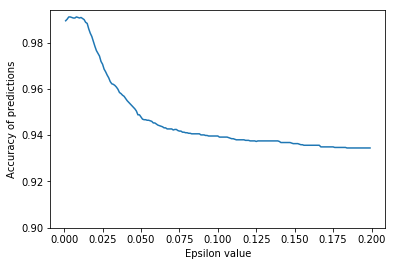

In [125]:
plt.plot(epsilon, acccuracy)
plt.ylim(bottom=0.9)
plt.xlabel("Epsilon value")
plt.ylabel("Accuracy of predictions")
